# Hands-on with Qiskit: Quantum Circuits and Quantum Gates

Before starting the exercises, run the first cell below by clicking on it and then pressing 'shift' + 'enter'. This is the general way to execute a code cell in a Jupyter notebook environment that you are using now. While it is running, you will see `In [*]`: in the top left of that cell. Once it finishes running, you will see a number instead of the star, which indicates how many cells you've run. 

In [1]:
# Import necessary modules for this notebook
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
from IPython.display import display, Latex

## Quantum Circuits

Quantum circuits are models for quantum computation in which a computation is a sequence of quantum gates. Let's see how to create a quantum circuit with Qiskit.


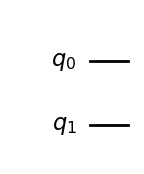

In [18]:
# Let's create a simple quantum circuit with two qubits

qc = QuantumCircuit(2)  
qc.draw(output='mpl') 

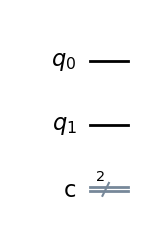

In [19]:
#  Let's create a simple quantum circuit with two qubits and two classical bits

qc = QuantumCircuit(2,2) 
qc.draw(output='mpl')

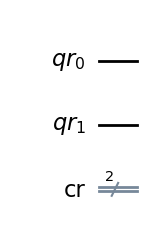

In [20]:
# Let's create a quantum circuit with a Quantum Register named 'qr' that has two qubits, and a Classical Register named 'cr' with two classical bits

qreg = QuantumRegister(2,'qr') 
creg = ClassicalRegister(2,'cr') 


qc = QuantumCircuit(qreg,creg) 
qc.draw(output='mpl') 

## Quantum Gates
Quantum circuits are models for quantum computation in which a computation is a sequence of quantum gates. Let's take a look at some of the popular quantum gates.

To understand how these gates operate on quantum states, we can make use of the Bloch sphere representation of quantum states. 


 ### The Bloch Sphere

An arbitrary single qubit state can be written as combination of the basis states $|0\rangle$ and $|1\rangle$: $|\psi\rangle= a|0\rangle+b|1\rangle$

where $a,b$ are complex numbers such that $|a|^2+|b|^2=1$. These conditions allow us to map a quantum state onto a Bloch sphere, a sphere of radius 1.

This is the Bloch sphere:

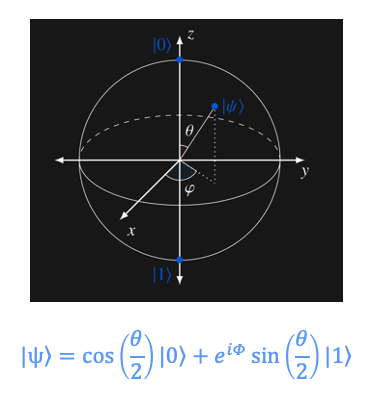

About the Bloch sphere:
- The Bloch sphere is a 3D geometric representation of a qubit's state
- Any arbitrary single-qubit state can be written as $\cos{\frac{θ}{2}}|0\rangle + e^{iφ}\sin{\frac{θ}{2}}|1\rangle$, where $e^{iφ}$ is the phase
- Points (states) are defined by two angles: θ (polar) and φ (azimuthal)
- The North Pole represents $|0\rangle$
- The South Pole represents $|1\rangle$
- The Equator represents equally weighted superpositions with different phases
- The X, Y, and Z axes correspond to the Pauli operators
- Every point on the Bloch sphere's surface represents a possible pure state of a single qubit.

### X Gate
An X gate equates to a rotation around the X-axis of the Bloch sphere by $\pi$ radians.
It maps $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$. It is the quantum equivalent of the NOT gate for classical computers and is sometimes called a bit-flip.

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

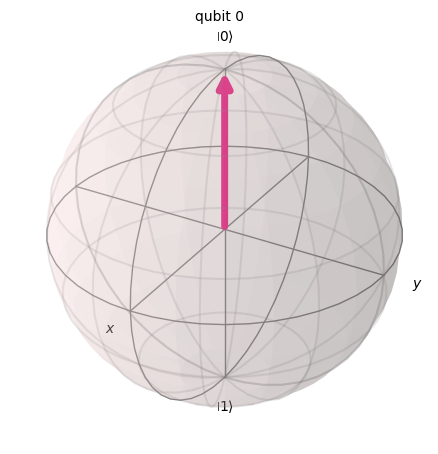

In [21]:
# Let's see the Bloch sphere visualization of the 0 state

plot_bloch_multivector([1,0]) # plots the state 0 represented as the column vector [1,0]ᵀ

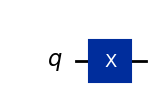

In [22]:
# Let's apply an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw(output='mpl')

In [ ]:
# Let's see Bloch sphere visualization
sv = Statevector(qc)
plot_bloch_multivector(sv)

### H Gate
A Hadamard gate represents a rotation of $\pi$ about the axis that is in the middle of the $X$-axis and $Z$-axis.
It maps the basis state $|0\rangle$ to $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, which means that a measurement will have equal probabilities of being `1` or `0`, creating a 'superposition' of states. This state is also written as $|+\rangle$.

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

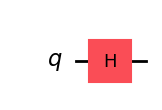

In [23]:
# Let's apply an H-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.h(0)
qc.draw(output='mpl')

<IPython.core.display.Latex object>

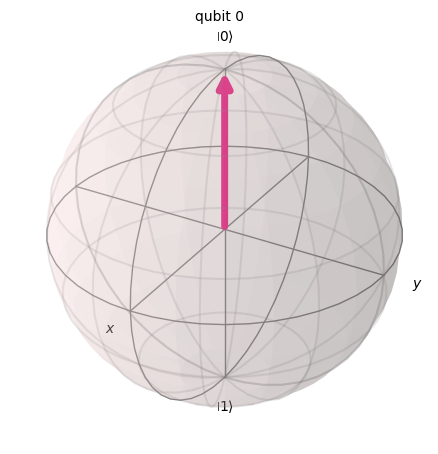

<IPython.core.display.Latex object>

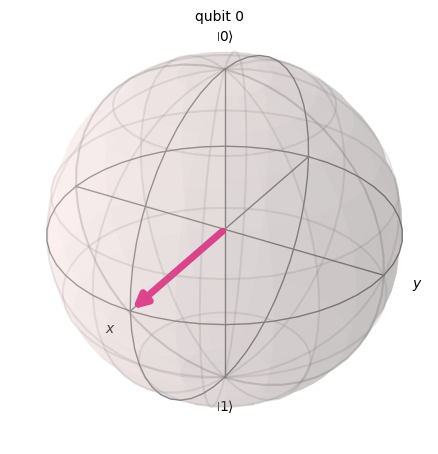

In [24]:
# Let's see the Bloch sphere visualization

display(Latex('Before Hadamard Gate (the $\ket{0}$ state)'))
display(plot_bloch_multivector([1,0])) # plotting the |0> state, whose statevector is the column vector [1,0]'

display(Latex('After Hadamard Gate (the $\ket{+}$ state)'))
sv = Statevector(qc)
display(plot_bloch_multivector(sv))


### Z Gate
The Z gate represents a rotation around the Z-axis of the Bloch sphere by $\pi$ radians. It is sometimes called a 'phase shift gate'.

$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}$

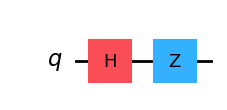

In [25]:
# Let's apply a Z-gate on |+>
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.draw(output='mpl')

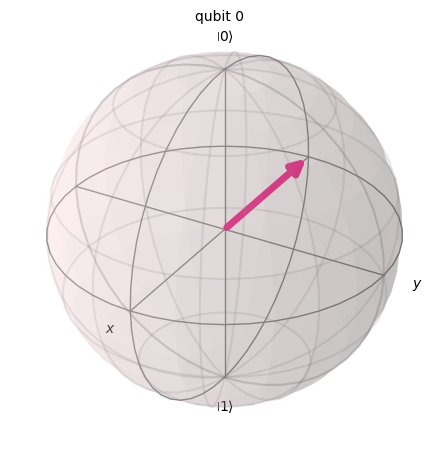

In [26]:
# Let's see the Bloch sphere visualization
sv = Statevector(qc)
plot_bloch_multivector(sv)

### CX Gate (CNOT Gate)
The controlled NOT (or CNOT or CX) gate acts on two qubits. It performs the NOT operation (equivalent to applying an X gate) on the second qubit only when the first qubit is $|1\rangle$ and otherwise leaves it unchanged. Note: Qiskit numbers the bits in a string from right to left.

$CX = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{pmatrix}$

<div class="alert alert-info">

Important note: Qiskit numbers the bits in a string from right to left. The Qiskit SDK uses the LSb 0 bit numbering. When displaying or interpreting a list of $n$ bits (or qubits) as a string, bit $n−1$ is the leftmost bit, and bit $0$ is the rightmost bit. This is because we usually write numbers with the most significant digit on the left, and in Qiskit, bit $n−1$ is interpreted as the most significant bit. For more details, see the [Bit-ordering in the Qiskit SDK](https://docs.quantum.ibm.com/guides/bit-ordering) topic.

</div>


So the matrix representation of $CX$ in Qiskit would be:

$CX = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
\end{pmatrix}$

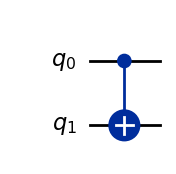

In [27]:
# Let's apply a CX-gate on |00>
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw(output='mpl')

## Exercises

### Exercise 1: Create the first Bell state

$ |\phi^+ \rangle = \frac{1}{\sqrt 2}(|00 \rangle + |11 \rangle) $

In [ ]:
# Create a Quantum Circuit


# Apply H gate


# Apply a CX gate


# Draw the circuit



In [ ]:
# Get the statevector of the circuit


# Plot the state using Bloch sphere visualization



In [ ]:
# Plot the state using qsphere visualization



### Exercise 2: Create the second Bell state

$ |\phi^- \rangle = \frac{1}{\sqrt 2}(|00 \rangle - |11 \rangle) $

In [ ]:
# Create a circuit with the second Bell state






In [ ]:
# Get the statevector of the circuit


# Plot the state using qsphere visualization



### Exercise 3: Create the 3-qubit GHZ state

$ |GHZ \rangle = \frac{1}{\sqrt 2}(|000 \rangle + |111 \rangle) $

In [ ]:
# Create a circuit with 3-qubit GHZ state






In [ ]:
# Get the statevector of the circuit


# Plot the state using qsphere visualization



### Exercise 4: Create Qiskit logo state

This is the Qiskit logo: 

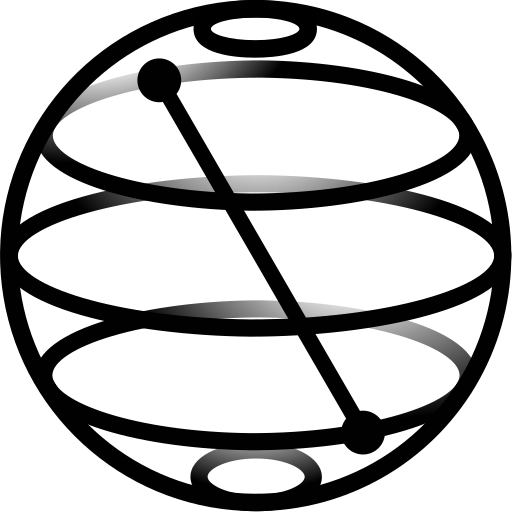

The logo was inspired by the following state:

$ |Qiskit \rangle = \frac{1}{\sqrt 2}(|0010 \rangle + |1101 \rangle) $

In [ ]:
# Create a circuit with the Qiskit logo state






In [ ]:
# Get the statevector of the circuit


# Plot the state using qsphere visualization



### Bonus Exercise: Create a n-qubit GHZ state

$ |GHZ_n \rangle = \frac{1}{\sqrt 2}(|000..0 \rangle + |111...1 \rangle) $

In [ ]:
# Create a function to generate a n-qubit GHZ state

def create_ghz(num_qubits):

    qc = 



    

    return qc

In [ ]:
# Use create_ghz function to generate a 6-qubit GHZ state

qc = create_ghz(6)
qc.draw()